# **Setup**

* https://www.kaggle.com/competitions/playground-series-s4e3/overview

In [1]:
!python --version

Python 3.11.8


In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import f1_score,r2_score,roc_auc_score,recall_score

In [4]:
Folder_Input = 'Input Data'

# **Data Import**

## **Data Download**

In [5]:
os.chdir(Folder_Input)
!kaggle competitions download -c playground-series-s4e3
os.chdir('..')


  0%|          | 0.00/1.74M [00:00<?, ?B/s]
 57%|█████▋    | 1.00M/1.74M [00:00<00:00, 2.19MB/s]
100%|██████████| 1.74M/1.74M [00:00<00:00, 3.36MB/s]


## **Data Extract**

In [6]:
def Extract_Zip(Zip_Filepath, Destination_Path):
    from zipfile import ZipFile
    with ZipFile(Zip_Filepath, 'r') as zip:
        zip.extractall(Destination_Path)

In [7]:
Extract_Zip(Zip_Filepath=f'{Folder_Input}/playground-series-s4e3.zip',
            Destination_Path=f'{Folder_Input}')

os.remove(f'{Folder_Input}/playground-series-s4e3.zip')

## **Data Loading**

In [8]:
Train = pd.read_csv(f'{Folder_Input}/train.csv')
Test_X = pd.read_csv(f'{Folder_Input}/test.csv')

print(Train.shape)
print(Test_X.shape)

(19219, 35)
(12814, 28)


In [9]:
print(Train.shape)
print(Train.columns)
Train.head()

(19219, 35)
Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [10]:
Target_Features_List = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']

# **Data Validation**

In [11]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [12]:
Train.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
Train.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

# **Data Exploration**

In [14]:
print(Target_Features_List)

['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']


## **Count Plot**

<Axes: xlabel='Pastry', ylabel='count'>

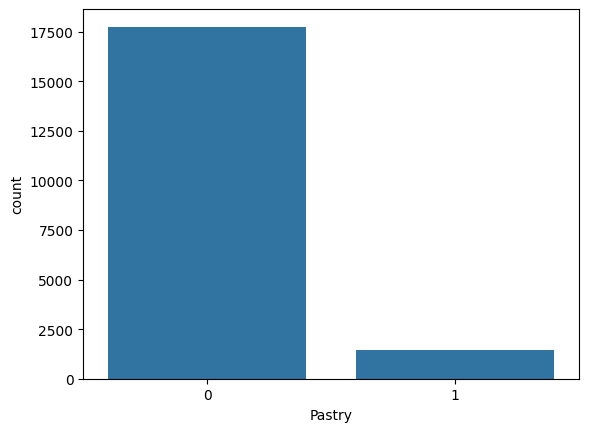

In [15]:
sns.countplot(data=Train,x='Pastry')

C:\Users\aksha\AppData\Local\Temp\ipykernel_6100\3524214532.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


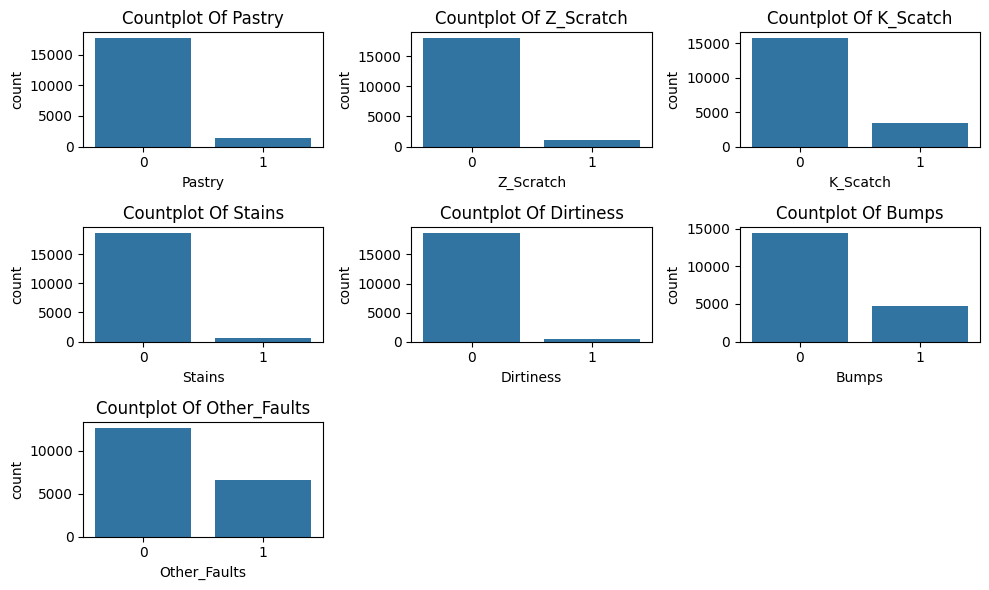

In [16]:
plt.subplots(figsize=(10,6))

for i,feature in enumerate(Target_Features_List,start=1):
    plt.subplot(3,3,i)
    sns.countplot(data=Train,x=feature)
    plt.title(f'Countplot Of {feature}')

plt.tight_layout()
plt.show()

## **Grouped Summary**

In [17]:
for feature in Target_Features_List:
    print('Summary of {}:'.format(feature))
    display(Train.groupby(feature).mean())

Summary of Pastry:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
Pastry,,,,,,,,,,,,,,,,,,,,,
0,9599.156875,691.631612,738.229482,1.858241e+06,1.855480e+06,1792.568242,100.985298,66.01059,203679.676562,84.846674,...,1.385477,0.066124,-0.134805,0.575940,0.064778,0.193263,0.031995,0.027319,0.268293,0.369402
1,9728.198499,930.532742,943.111869,1.747004e+06,1.739134e+06,369.095498,31.101637,41.27899,48551.167121,84.345157,...,1.441316,0.546184,-0.181693,0.523001,0.000000,0.000682,0.000000,0.000000,0.000000,0.000000


Summary of Z_Scratch:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
Z_Scratch,,,,,,,,,,,,,,,,,,,,,
0,9604.918867,724.280646,769.847363,1.855587e+06,1.852776e+06,1760.747357,98.814268,65.707012,198492.456196,84.364160,...,1.391266,0.094250,-0.136906,0.571987,0.081133,0.189939,0.031435,0.026842,0.263601,0.362942
1,9673.123478,483.191304,502.624348,1.758136e+06,1.749649e+06,477.925217,46.010435,39.253043,87427.059130,91.788696,...,1.365709,0.236176,-0.161565,0.570573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Summary of K_Scatch:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,Stains,Dirtiness,Bumps,Other_Faults
K_Scatch,,,,,,,,,,,,,,,,,,,,,
0,9609.922531,836.395452,856.672009,1.840338e+06,1.836611e+06,464.758029,39.687148,34.428390,59825.386901,92.690061,...,1.286384,0.196985,-0.138869,0.489467,0.092798,0.072845,0.035979,0.030721,0.301577,0.414265
1,9604.756410,127.774476,280.917541,1.893079e+06,1.892578e+06,7292.372669,353.101981,200.722611,799136.924825,48.553322,...,1.865154,-0.330767,-0.136140,0.951100,0.000291,0.000000,0.000000,0.000000,0.000583,0.005245


Summary of Stains:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Dirtiness,Bumps,Other_Faults
Stains,,,,,,,,,,,,,,,,,,,,,
0,9604.744089,705.573106,750.645649,1.862761e+06,1.860131e+06,1734.417779,98.28036,65.891159,197573.659697,83.969224,...,1.410499,0.112878,-0.141891,0.584438,0.078602,0.061659,0.184012,0.026004,0.255375,0.351617
1,9748.748239,850.445423,859.327465,1.422713e+06,1.402471e+06,28.049296,9.43662,6.100352,3793.982394,112.364437,...,0.707987,-0.230058,-0.023146,0.160286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Summary of Dirtiness:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Bumps,Other_Faults
Dirtiness,,,,,,,,,,,,,,,,,,,,,
0,9611.708445,706.054126,750.805701,1.851425e+06,1.848868e+06,1716.126828,97.090531,64.438454,195168.859026,84.449824,...,1.386438,0.091217,-0.139135,0.570898,0.078253,0.061386,0.183196,0.030319,0.254244,0.350059
1,9504.381443,856.657732,871.744330,1.785288e+06,1.759204e+06,442.552577,40.191753,51.981443,63521.451546,98.659794,...,1.517139,0.547940,-0.109294,0.610703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Summary of Bumps:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Other_Faults
Bumps,,,,,,,,,,,,,,,,,,,,,
0,9607.528639,647.271444,700.227034,1.788086e+06,1.784988e+06,2163.687742,117.934906,77.305894,244446.385100,82.587645,...,1.443710,0.093178,-0.134526,0.614218,0.101411,0.079552,0.237272,0.039292,0.03355,0.453652
1,9613.465673,899.798656,916.629855,2.036928e+06,2.033617e+06,228.068024,28.032752,24.116523,32203.310099,91.548604,...,1.225925,0.131769,-0.150085,0.443471,0.000000,0.000000,0.000420,0.000000,0.00000,0.000000


Summary of Other_Faults:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps
Other_Faults,,,,,,,,,,,,,,,,,,,,,
0,9629.329200,644.972277,698.658953,1.876096e+06,1.871897e+06,2209.99226,119.487955,76.820788,250587.453835,80.479425,...,1.431428,0.066195,-0.141588,0.602816,0.115789,0.09083,0.269647,0.044862,0.038307,0.376195
1,9569.752059,835.117871,860.425282,1.798903e+06,1.797776e+06,668.47301,49.641659,39.611619,78440.615432,93.166057,...,1.309246,0.173301,-0.132192,0.512219,0.000000,0.00000,0.002745,0.000000,0.000000,0.000000


# **Data Processing**

## **Data Split**

In [18]:
print('Train Data Size Before Split: ', Train.shape)

# Split Training Data
Train,Val = train_test_split(Train, test_size=0.2, random_state=42)

print('Train Data Size: ', Train.shape)
print('Validation Data Size: ', Val.shape)
Val.head()

Train Data Size Before Split:  (19219, 35)
Train Data Size:  (15375, 35)
Validation Data Size:  (3844, 35)


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
4265,4265,830,837,966898,966930,109,20,20,12773,104,...,0.5500,-0.0791,0.3359,0,0,0,0,0,0,1
6215,6215,41,86,1477978,1477986,3319,175,129,379668,39,...,-0.5143,-0.1887,1.0000,0,0,1,0,0,0,0
10080,10080,1505,1522,114430,114444,140,20,15,15359,87,...,-0.1667,-0.1805,0.2860,0,0,0,0,0,0,1
7353,7353,1611,1629,1725137,1725163,196,28,28,19434,87,...,0.4583,-0.1807,0.6173,0,0,0,0,0,0,1
3169,3169,1287,1302,1736811,1736822,126,30,22,16258,101,...,0.4091,-0.1525,0.4729,0,0,0,0,0,0,1


## **Feature Split**

In [19]:
# Train Data - Feature Split
Train_X = Train.drop(Target_Features_List, axis=1)
Train_Y = Train[Target_Features_List]

print(Train_X.shape, Train_Y.shape)

(15375, 28) (15375, 7)


In [20]:
# Val Data - Feature Split
Val_X = Val.drop(Target_Features_List, axis=1)
Val_Y = Val[Target_Features_List]

print(Val_X.shape, Val_Y.shape)

(3844, 28) (3844, 7)


In [21]:
Train_Y.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
9002,0,0,0,0,0,0,1
4731,0,0,0,0,0,0,1
4125,1,0,0,0,0,0,0
1372,0,0,0,0,0,1,0
984,0,0,1,0,0,0,0


In [22]:
Train_Y.values

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [23]:
Train_Y.values.shape

(15375, 7)

In [24]:
Train_Y.values.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## **Feature Drop**

In [25]:
# Drop id Column
Train_X.drop('id', axis=1, inplace=True)
Val_X.drop('id', axis=1, inplace=True)
Test_X.drop('id', axis=1, inplace=True)

print(Train_X.shape, Val_X.shape, Test_X.shape)

(15375, 27) (3844, 27) (12814, 27)


## **Data Preview**

In [26]:
print('\n','Training Data')
display(Train_X.head())

print('\n','Validation Data')
display(Val_X.head())

print('\n','Test Data')
display(Test_X.head())


 Training Data


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
9002,921,934,506783,506794,140,22,13,14742,84,111,...,0.0103,0.6842,1.0000,0.0,2.1461,1.1461,1.1139,-0.1429,-0.2492,0.2901
4731,779,842,1458128,1458136,2160,173,85,275539,88,124,...,0.0776,0.7813,0.6286,0.0,3.3404,2.1271,1.6721,-0.6548,-0.1821,1.0000
4125,1323,1333,600561,600841,2243,165,285,262543,99,125,...,0.0081,0.2000,0.9789,1.0,3.3508,1.0414,2.4533,0.7568,-0.1435,1.0000
1372,1277,1290,1144047,1144070,194,21,18,19202,84,118,...,0.0126,0.8095,0.9444,0.0,2.2878,1.2305,1.2305,-0.0588,-0.2397,0.4498
984,39,212,1814642,1814708,4788,256,113,516343,49,127,...,0.1261,0.6914,0.5664,0.0,3.6366,2.2330,1.7708,-0.6546,-0.1382,1.0000



 Validation Data


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
4265,830,837,966898,966930,109,20,20,12773,104,134,...,0.0073,0.5000,1.0000,1.0,2.0374,1.0000,1.3010,0.5500,-0.0791,0.3359
6215,41,86,1477978,1477986,3319,175,129,379668,39,133,...,0.0301,0.4839,0.4125,0.0,3.5169,1.6233,1.6902,-0.5143,-0.1887,1.0000
10080,1505,1522,114430,114444,140,20,15,15359,87,119,...,0.0089,0.7500,0.4667,0.0,2.1461,1.1761,1.1461,-0.1667,-0.1805,0.2860
7353,1611,1629,1725137,1725163,196,28,28,19434,87,126,...,0.0104,0.6071,0.9286,1.0,2.2923,1.2305,1.3802,0.4583,-0.1807,0.6173
3169,1287,1302,1736811,1736822,126,30,22,16258,101,127,...,0.0099,0.4000,1.0000,1.0,2.1004,1.1139,1.3424,0.4091,-0.1525,0.4729



 Test Data


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,1015,1033,3826564,3826588,659,23,46,62357,67,127,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,1257,1271,419960,419973,370,26,28,39293,92,132,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,1358,1372,117715,117724,289,36,32,29386,101,134,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,158,168,232415,232440,80,10,11,8586,107,140,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,559,592,544375,544389,140,19,15,15524,103,134,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


## **Feature Scaling**

In [27]:
from sklearn.preprocessing import MinMaxScaler

Feature_Scaler01 = MinMaxScaler()
Train_X_Scaled = Feature_Scaler01.fit_transform(Train_X)
Val_X_Scaled = Feature_Scaler01.transform(Val_X)
Test_X_Scaled = Feature_Scaler01.transform(Test_X)

print(Train_X_Scaled.shape, Val_X_Scaled.shape, Test_X_Scaled.shape)
display(Train_X_Scaled[:2,:])
display(Val_X_Scaled[:2,:])
display(Test_X_Scaled[:2,:])

(15375, 27) (3844, 27) (12814, 27)


array([[5.40175953e-01, 5.44177882e-01, 3.85234546e-02, 3.85233212e-02,
        8.77830841e-04, 2.64865581e-03, 1.22086570e-02, 1.25026270e-03,
        4.28571429e-01, 2.19780220e-01, 2.72540984e-01, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 6.22487942e-01, 3.42318059e-01,
        8.55904003e-01, 1.32610006e-02, 6.79586039e-01, 1.00000000e+00,
        0.00000000e+00, 3.62252059e-01, 3.13429515e-01, 2.76175836e-01,
        4.26998636e-01, 2.87928417e-01, 1.94211124e-01],
       [4.56891496e-01, 4.90345231e-01, 1.11811240e-01, 1.11810768e-01,
        1.41108032e-02, 2.26460072e-02, 9.21198668e-02, 2.37499012e-02,
        4.48979592e-01, 2.91208791e-01, 2.68442623e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 7.10108521e-01, 4.16603774e-01,
        3.39719673e-01, 1.14677517e-01, 7.78104708e-01, 5.85027933e-01,
        0.00000000e+00, 6.78530759e-01, 6.77261432e-01, 4.14573674e-01,
        1.68476340e-01, 3.41535512e-01, 1.00000000e+00]])

array([[4.86803519e-01, 4.87419544e-01, 7.39688601e-02, 7.39702925e-02,
        6.74750572e-04, 2.38379023e-03, 1.99778024e-02, 1.08039193e-03,
        5.30612245e-01, 3.46153846e-01, 2.80737705e-01, 0.00000000e+00,
        1.00000000e+00, 6.15384615e-01, 7.72809486e-01, 4.41078167e-01,
        4.45396793e-01, 8.74020494e-03, 4.92694805e-01, 1.00000000e+00,
        1.00000000e+00, 3.33465745e-01, 2.59244149e-01, 3.22564649e-01,
        7.76930458e-01, 4.23823600e-01, 2.46197503e-01],
       [2.40469208e-02, 4.79812756e-02, 1.13340404e-01, 1.13339930e-01,
        2.17033849e-02, 2.29108727e-02, 1.40954495e-01, 3.27333821e-02,
        1.98979592e-01, 3.40659341e-01, 2.72540984e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 6.06913183e-02, 5.23557951e-01,
        4.81395583e-01, 4.30982520e-02, 4.76359578e-01, 3.43575419e-01,
        0.00000000e+00, 7.25272106e-01, 4.90412788e-01, 4.19061315e-01,
        2.39432352e-01, 3.36262683e-01, 1.00000000e+00]])

array([[0.59530792, 0.6021065 , 0.294266  , 0.2942665 , 0.00427779,
        0.00278109, 0.04883463, 0.00535813, 0.34183673, 0.30769231,
        0.87909836, 0.        , 1.        , 0.42307692, 0.38956994,
        0.52787062, 0.32166986, 0.01205546, 0.5588474 , 1.        ,
        1.        , 0.54627791, 0.30148722, 0.41226787, 0.83889703,
        0.30638332, 0.90601589],
       [0.7372434 , 0.74136922, 0.03183496, 0.03183499, 0.00238456,
        0.00317839, 0.02885683, 0.00336834, 0.46938776, 0.33516484,
        0.2602459 , 0.        , 1.        , 0.        , 0.16368569,
        0.44592992, 0.08621559, 0.00482218, 0.23031656, 1.        ,
        1.        , 0.47403406, 0.22330601, 0.35881288, 0.95687087,
        0.37093553, 0.89829739]])

# **Data Exploration**

In [28]:
# sns.pairplot(data=Train_X)

# **Data Model**

In [29]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score,precision_recall_curve

## **Create Model**

In [30]:
from sklearn.linear_model import LogisticRegression

Model01 = MultiOutputClassifier(LogisticRegression())
Model01_History = Model01.fit(Train_X_Scaled, Train_Y)
display(Model01_History)

# Get Predictions
Val_Y_Pred = Model01.predict(Val_X_Scaled)

MultiOutputClassifier(estimator=LogisticRegression())

## **Model Evaluation**

In [57]:
for feature in Target_Features_List:
    display(Train_Y[feature].value_counts())

Pastry
0    14210
1     1165
Name: count, dtype: int64

Z_Scratch
0    14445
1      930
Name: count, dtype: int64

K_Scatch
0    12625
1     2750
Name: count, dtype: int64

Stains
0    14907
1      468
Name: count, dtype: int64

Dirtiness
0    14975
1      400
Name: count, dtype: int64

Bumps
0    11538
1     3837
Name: count, dtype: int64

Other_Faults
0    10166
1     5209
Name: count, dtype: int64

In [58]:
for feature in Target_Features_List:
    display(Val_Y[feature].value_counts())

Pastry
0    3543
1     301
Name: count, dtype: int64

Z_Scratch
0    3624
1     220
Name: count, dtype: int64

K_Scatch
0    3162
1     682
Name: count, dtype: int64

Stains
0    3744
1     100
Name: count, dtype: int64

Dirtiness
0    3759
1      85
Name: count, dtype: int64

Bumps
0    2918
1     926
Name: count, dtype: int64

Other_Faults
0    2495
1    1349
Name: count, dtype: int64

In [47]:
Val_Y.value_counts()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       0          0      1               1349
                                                1      0                924
                   1         0       0          0      0                680
1       0          0         0       0          0      0                301
0       1          0         0       0          0      0                220
        0          0         0       0          0      0                183
                             1       0          0      0                100
                             0       1          0      0                 85
                   1         0       0          1      0                  2
Name: count, dtype: int64

In [41]:
Model01_CR = classification_report(Val_Y.values,Val_Y_Pred,target_names=Target_Features_List,output_dict=True,digits=4)
Model01_CR = pd.DataFrame(Model01_CR)

Model01_CR

c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,micro avg,macro avg,weighted avg,samples avg
precision,0.636364,0.586538,0.902222,0.632075,0.0,0.551821,0.586294,0.711098,0.556474,0.628175,0.305541
recall,0.046512,0.277273,0.892962,0.670000,0.0,0.212743,0.171238,0.321867,0.324390,0.321867,0.306712
f1-score,0.086687,0.376543,0.897568,0.650485,0.0,0.307093,0.265060,0.443150,0.369062,0.389860,0.305931
support,301.000000,220.000000,682.000000,100.000000,85.0,926.000000,1349.000000,3663.000000,3663.000000,3663.000000,3663.000000


In [46]:
Model01_CR.loc['support',Target_Features_List].sum()

3663.0